## **2 Input and Output**

1. Imports Library

In [1]:
# Import the necessary libraries

!pip install catboost
import warnings
warnings.filterwarnings("ignore") # Ignore warnings raised by the code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Utility class to help normalize labels
from sklearn.model_selection import train_test_split # Function to split arrays or matrices into random train and test subsets
from sklearn.metrics import roc_auc_score # Function to compute the area under the ROC curve
from catboost import CatBoostClassifier # Gradient boosting library that uses categorical features by default
import xgboost as xgb # Gradient boosting library
from sklearn.model_selection import KFold # Class to generate indices to split data into training and test set folds
from sklearn.ensemble import ExtraTreesClassifier # Implementation of the Extra Trees algorithm
from sklearn.ensemble import RandomForestClassifier # Implementation of the Random Forest algorithm for classification
from sklearn.metrics import mean_absolute_error # Function to compute the mean absolute error between two arrays
import gc # Module for performing operations on the garbage collector



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.1 MB/s eta 0:00:00


2. Uploading CSV files from Google Drive

In [2]:
#Import .csv files from Google Drive
! gdown --id 1Ln0KrCZD6csKGTgVa3Wx4CWd5txbULHv -O application_train.csv #Uploading application_train.csv File
! gdown --id 1J5DSbt60VpGMf7-MGdsSvxrtgKZGVGCh -O application_test.csv #Uploading application_test.csv File
! gdown --id 1CmTH_utCT2FrgvvPhqEl3rQxF4BOaZgj -O bureau_balance.csv #Uploading bureau_balance.csv File
! gdown --id 1mG3-C020GPyQhsc4mdzaWjfvE1x6ZxoX -O bureau.csv #Uploading bureau.csv File
! gdown --id 1oflD8-ZlbMcViqypxAsoKgfEfwl5sPzQ -O credit_card_balance.csv #Uploading credit_card_balance.csv File
! gdown --id 1sFKY7I_wz6XBYA_t0Tjbo_MKWZgj7zhk -O installments_payments.csv #Uploading installments_payments.csv File
! gdown --id 1LejCjdOj_1_bI2yrUo_hs62CKwfH59lg -O previous_application.csv #Uploading previous_application.csv File
! gdown --id 1QZlbRGi9VgZOA4h_dQBG114dOM_32PSE -O POS_CASH_balance.csv #Uploading POS_CASH_balance.csv File

#Reading .csv files 
import pandas as pd
application_train = pd.read_csv('application_train.csv')
application_test = pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
installments_payments = pd.read_csv('installments_payments.csv')
previous_application = pd.read_csv('previous_application.csv')
POS_CASH_balance = pd.read_csv('POS_CASH_balance.csv')




/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ln0KrCZD6csKGTgVa3Wx4CWd5txbULHv
To: /content/application_train.csv
100% 166M/166M [00:02<00:00, 62.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1J5DSbt60VpGMf7-MGdsSvxrtgKZGVGCh
To: /content/application_test.csv
100% 26.6M/26.6M [00:00<00:00, 44.1MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://dr

3. Check File Headers

In [3]:
#View application_train data frame
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#View application_test data frame
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#View bureau data frame
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [6]:
#View bureau_balance data frame
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [7]:
#View credit_card_balance data frame
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [8]:
#View installments_payments data frame
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [9]:
#View previous_application data frame
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## **3 Implementation and validation**

1. Check the missing values in each file.

In [10]:
#Default codes for figuring out the missing values 

def missing_data(data):
    # Calculate the total number of missing values for each column in the input dataframe `data` and sort the values in descending order
    total = data.isnull().sum().sort_values(ascending = False)

    # Calculate the percentage of missing values for each column in the input dataframe `data` and sort the values in descending order
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    
    # Concatenate the `total` and `percent` dataframes along the columns axis (`axis=1`) and set the column headers to 'Total' and 'Percent', respectively
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


In [11]:
#View application_train missing data
missing_data(application_train).head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [12]:
#View application_test missing data
missing_data(application_test).head(10)

,Total,Percent
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302


In [13]:
#View bureau missing data
missing_data(bureau)

,Total,Percent
AMT_ANNUITY,1226791,71.473490
AMT_CREDIT_MAX_OVERDUE,1124488,65.513264
DAYS_ENDDATE_FACT,633653,36.916958
AMT_CREDIT_SUM_LIMIT,591780,34.477415
AMT_CREDIT_SUM_DEBT,257669,15.011932
DAYS_CREDIT_ENDDATE,105553,6.149573
AMT_CREDIT_SUM,13,0.000757
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


In [14]:
#View bureau_balance missing data
missing_data(bureau_balance)

,Total,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


In [15]:
#View credit_card_balance missing data
missing_data(credit_card_balance)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,19.998063
AMT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_DRAWINGS_POS_CURRENT,749816,19.524872
AMT_DRAWINGS_OTHER_CURRENT,749816,19.524872
AMT_DRAWINGS_POS_CURRENT,749816,19.524872
CNT_DRAWINGS_OTHER_CURRENT,749816,19.524872
CNT_DRAWINGS_ATM_CURRENT,749816,19.524872
CNT_INSTALMENT_MATURE_CUM,305236,7.948208
AMT_INST_MIN_REGULARITY,305236,7.948208
SK_ID_PREV,0,0.000000


In [16]:
#View installments_payments missing data
missing_data(installments_payments)

,Total,Percent
DAYS_ENTRY_PAYMENT,2905,0.021352
AMT_PAYMENT,2905,0.021352
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
DAYS_INSTALMENT,0,0.000000
AMT_INSTALMENT,0,0.000000


2. Explore the data

Categorical features

In [17]:
import seaborn as sns

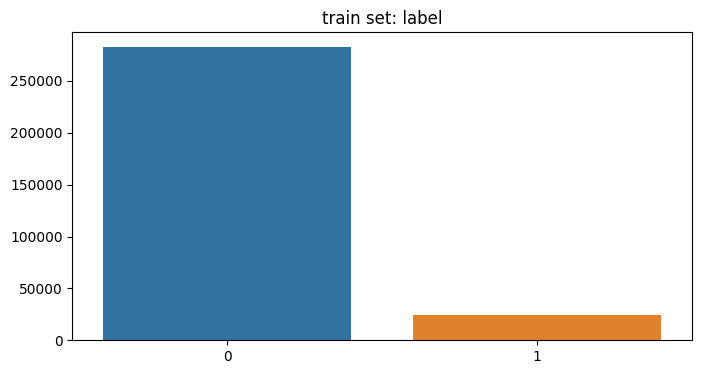

In [18]:
#Default code for plotting

def plot_categorical(data, col, size=[8 ,4], xlabel_angle=0, title=''):
    '''
    This function is used for plotting the count of categorical features.
    Parameters:
    data: the input dataframe
    col: the name of the categorical column to be plotted
    size: the size of the plot, default [8, 4]
    xlabel_angle: the angle to rotate the x-axis labels, default 0
    title: the title of the plot, default ''
    '''
    # Calculate the count of each category in the categorical column
    plotdata = data[col].value_counts()

    # Set the size of the plot
    plt.figure(figsize = size)
    
    # Create a bar plot using seaborn's barplot function
    sns.barplot(x = plotdata.index, y=plotdata.values)
    
    # Set the title of the plot
    plt.title(title)
    
    # Rotate the x-axis labels if `xlabel_angle` is not 0
    if xlabel_angle != 0: 
        plt.xticks(rotation=xlabel_angle)
    
    # Show the plot
    plt.show()

    #Plot for application_train Target: (0 = repaid on time, 1 = difficultt repaying)
plot_categorical(data=application_train, col='TARGET', size=[8 ,4], xlabel_angle=0, title='train set: label')



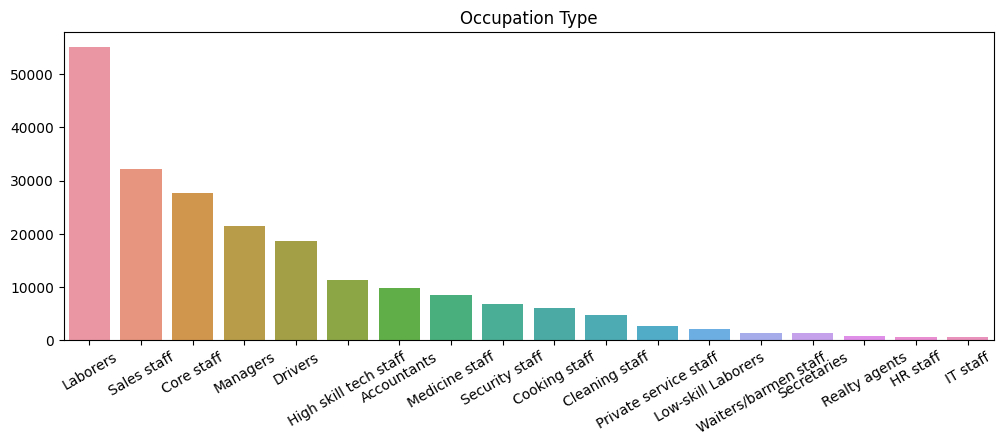

In [19]:
#Plot for application_train Occupation Type
plot_categorical(data=application_train, col='OCCUPATION_TYPE', size=[12 ,4], xlabel_angle=30, title='Occupation Type')

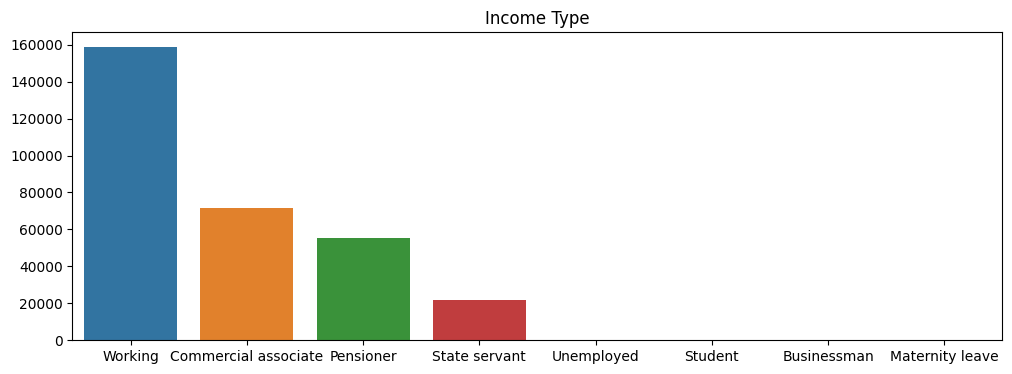

In [20]:
#Plot for application_train Name_Income_Type 
plot_categorical(data=application_train, col='NAME_INCOME_TYPE', size=[12 ,4], xlabel_angle=0, title='Income Type')

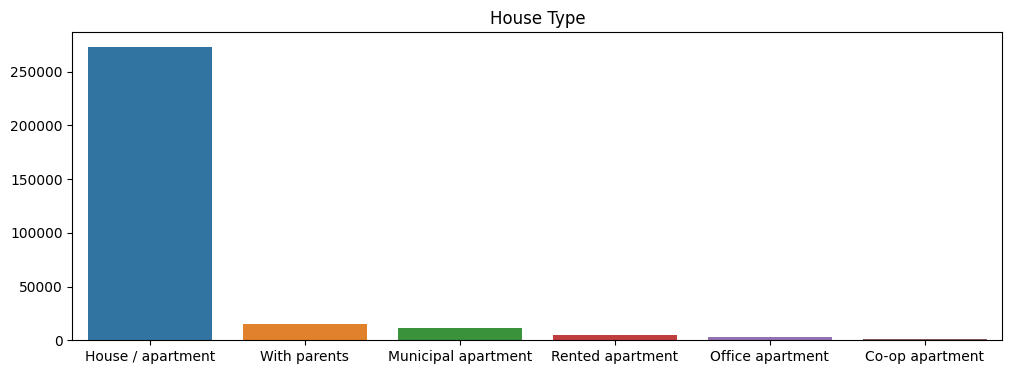

In [21]:
#Plot for application_train Name Housing Type
plot_categorical(data=application_train, col='NAME_HOUSING_TYPE', size=[12 ,4], xlabel_angle=0, title='House Type')

Numerical features

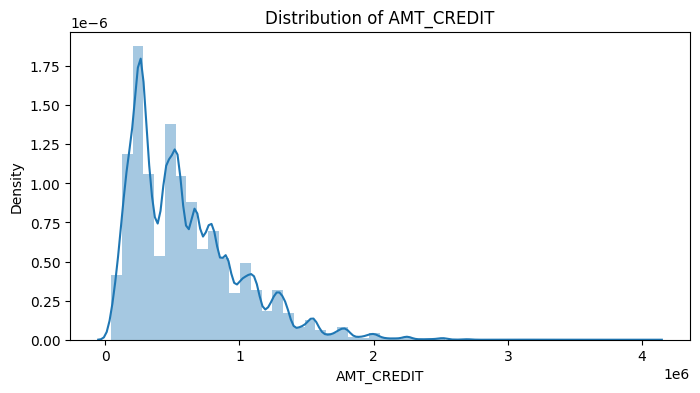

In [22]:
#Default code for plotting

def plot_numerical(data, col, size=[8, 4], bins=50):
    '''use this for ploting the distribution of numercial features'''
    # Set the size of the plot
    plt.figure(figsize=size)
    # Set the title of the plot
    plt.title("Distribution of %s" % col)
    # Create a histogram using seaborn's distplot function
    sns.distplot(data[col].dropna(), kde=True,bins=bins)
    # Show the plot
    plt.show()

#Plot for application_train AMT_Credit
plot_numerical(application_train, 'AMT_CREDIT')

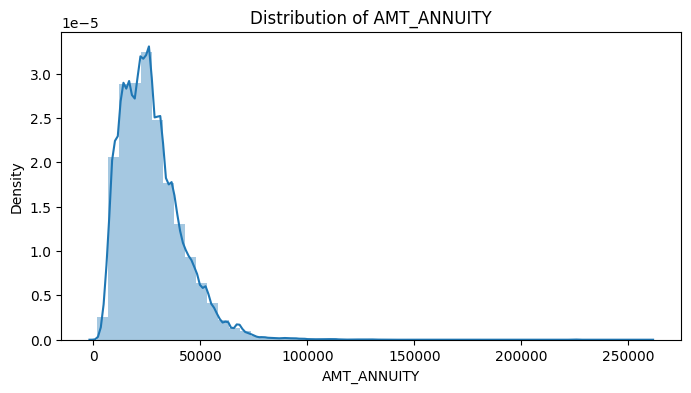

In [23]:
#Plot for application_train AMT_ANNUITY
plot_numerical(application_train, 'AMT_ANNUITY')


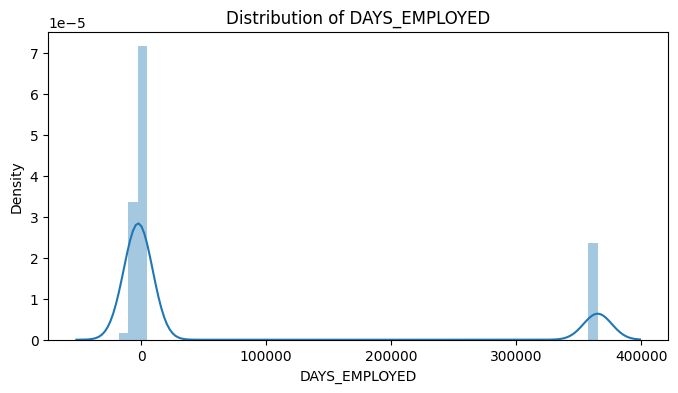

In [24]:
#Plot for application_train DAYS_EMPLOYED
plot_numerical(application_train, 'DAYS_EMPLOYED')

Categorical features by label

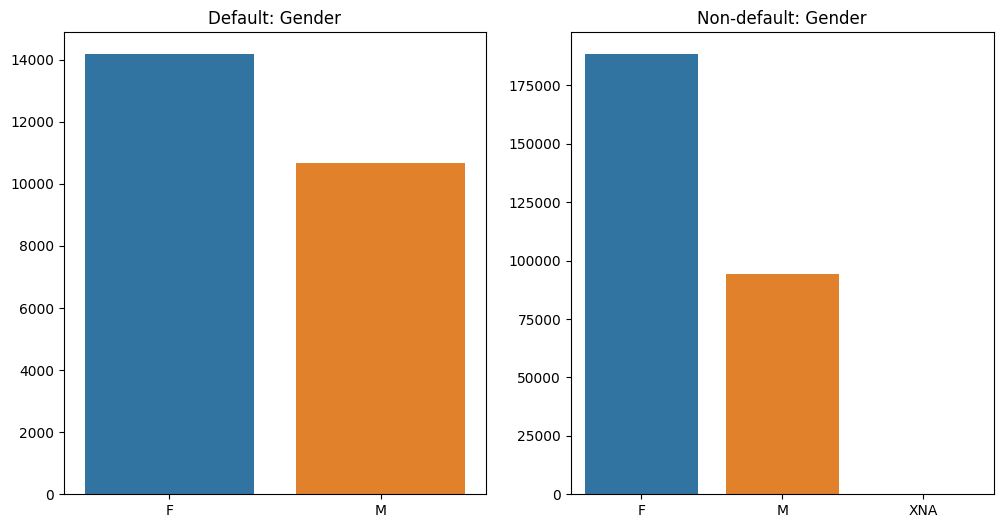

In [25]:
#Default code for plotting

def plot_categorical_bylabel(data, col, size=[12 ,6], xlabel_angle=0, title=''):
    '''use it to compare the distribution between label 1 and label 0'''
     # Set the size of the plot
    plt.figure(figsize = size)
    # Subset the data by the target variable (i.e., label)
    l1 = data.loc[data.TARGET==1, col].value_counts()
    l0 = data.loc[data.TARGET==0, col].value_counts()
    # Create a subplot with two bar plots side-by-side using seaborn's barplot function
    plt.subplot(1,2,1)
    sns.barplot(x = l1.index, y=l1.values)
    plt.title('Default: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.subplot(1,2,2)
    sns.barplot(x = l0.index, y=l0.values)
    plt.title('Non-default: '+title)
    plt.xticks(rotation=xlabel_angle)

    # Show the plot
    plt.show()

#Plot for application_train CODE GENDER
plot_categorical_bylabel(application_train, 'CODE_GENDER', title='Gender')

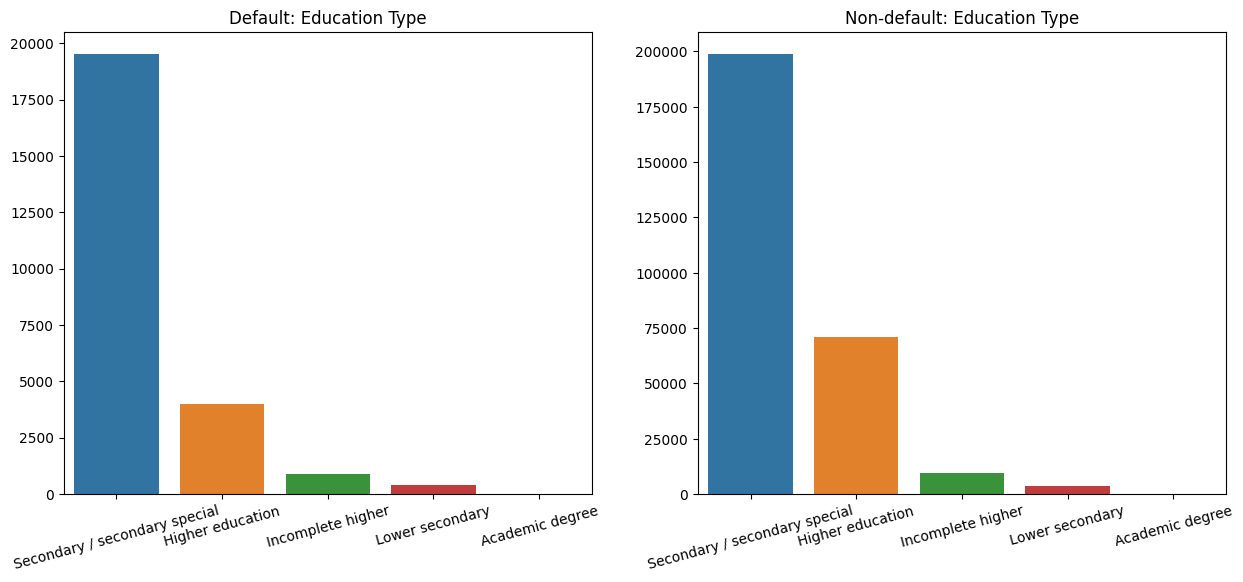

In [26]:
#Plot for application_train NAME_EDUCATION_TYPE
plot_categorical_bylabel(application_train, 'NAME_EDUCATION_TYPE', size=[15 ,6], xlabel_angle=15, title='Education Type')


Numerical features by label

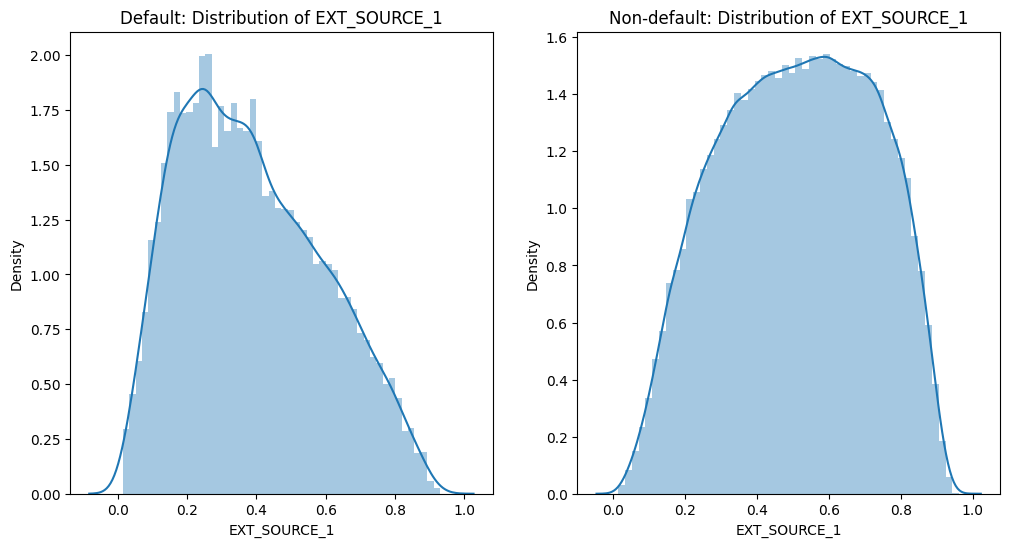

In [27]:
#Default code for plotting

def plot_numerical_bylabel(data, col, size=[8, 4], bins=50):
    '''use this to compare the distribution of numercial features'''
     # Set the size of the plot
    plt.figure(figsize=[12, 6])
    # Subset the data by the target variable (i.e., label)
    l1 = data.loc[data.TARGET==1, col]
    l0 = data.loc[data.TARGET==0, col]
    # Create a subplot with two histogram plots side-by-side using seaborn's distplot function
    plt.subplot(1,2,1)
    sns.distplot(l1.dropna(), kde=True,bins=bins)
    plt.title('Default: Distribution of %s' % col)
    plt.subplot(1,2,2)
    sns.distplot(l0.dropna(), kde=True,bins=bins)
    plt.title('Non-default: Distribution of %s' % col)
     # Show the plot
    plt.show()

    #Plot for application_train EXT_SOURCE_1
plot_numerical_bylabel(application_train, 'EXT_SOURCE_1', bins=50)

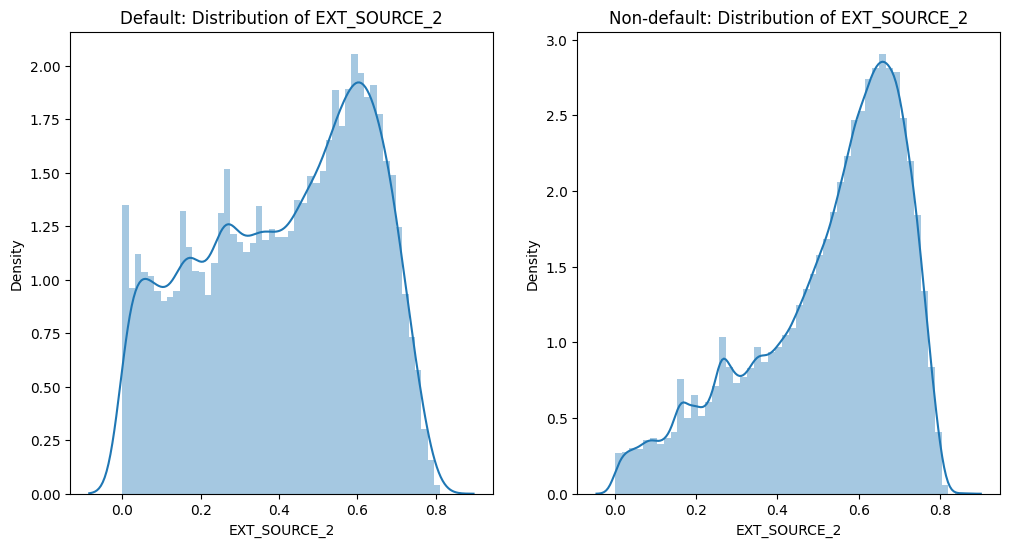

In [28]:
#Plot for application_train EXT_SOURCE_2
plot_numerical_bylabel(application_train, 'EXT_SOURCE_2', bins=50)


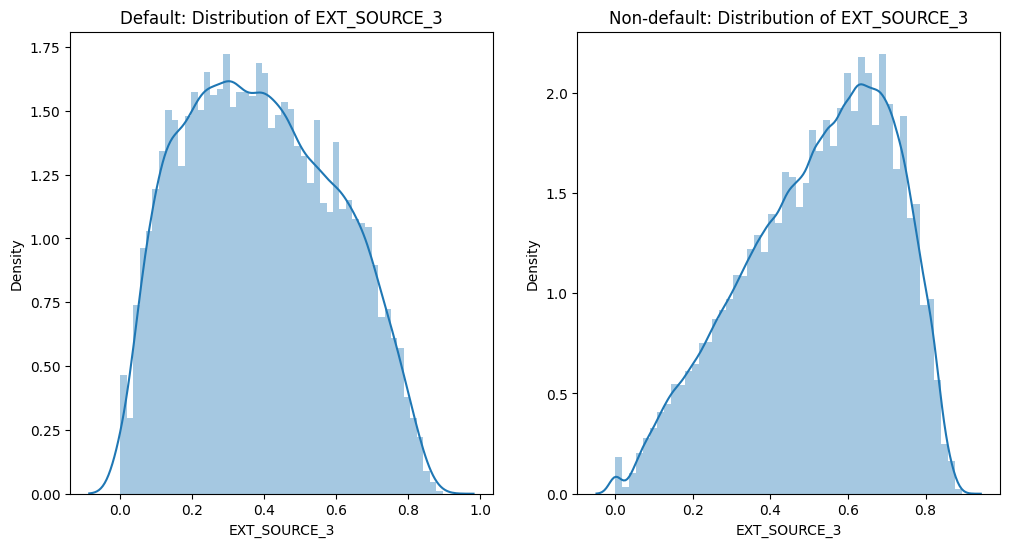

In [29]:
#Plot for application_train EXT_SOURCE_3
plot_numerical_bylabel(application_train, 'EXT_SOURCE_3', bins=50)

Correlation Matrix

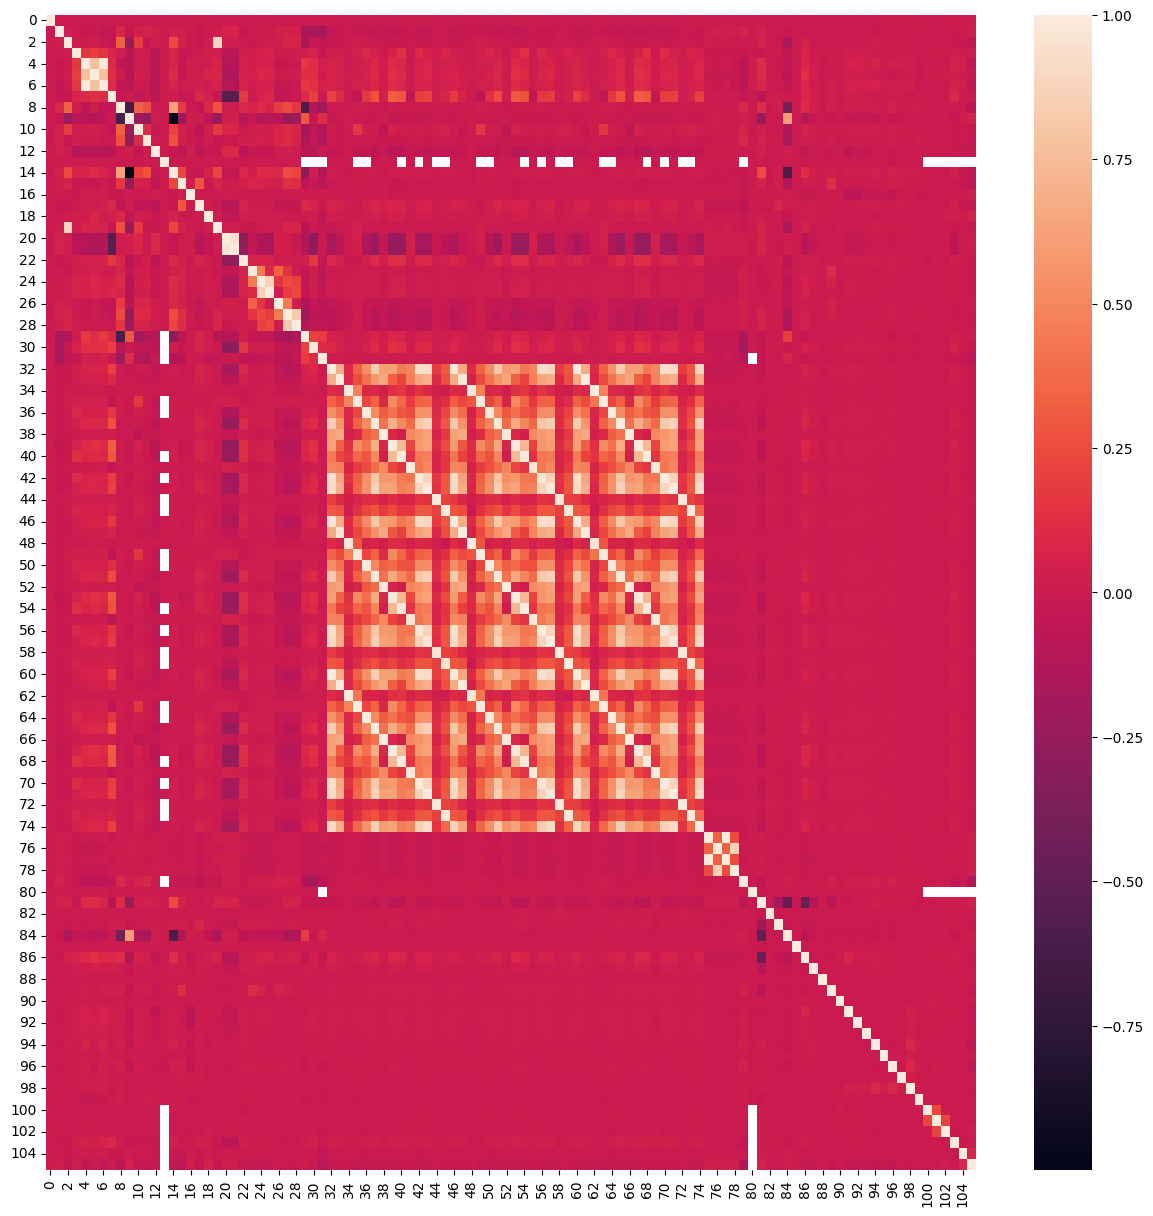

In [30]:
# Calculate the correlation matrix using the corr() method from pandas
corr_mat = application_train.corr()
# Set the size of the plot using the figure() function from matplotlib
plt.figure(figsize=[15, 15])
# Create a heatmap of the correlation matrix using seaborn's heatmap() function
sns.heatmap(corr_mat.values, annot=False)

# Show the plot
plt.show()


### 3. Simple LightGBM

Solve imbalance problem

In [31]:
import pandas as pd
import numpy as np
import gc
from sklearn.model_selection import train_test_split

# Load the dataset
application_data = pd.read_csv('application_train.csv')

In [32]:
# Get positive sample (i.e., borrowers who had difficulties paying back their loans)
n_pos = application_data[application_data.TARGET==1].shape[0] # Get the number of positive samples
pos_data = application_data[application_data.TARGET==1] # Subset the data to only include positive samples

# Get negative sample (i.e., borrowers who did not have difficulties paying back their loans), and select a subset
n_neg = application_data[application_data.TARGET==0].shape[0] # Get the number of negative samples
neg_data = application_data[application_data.TARGET==0].iloc[np.random.randint(0, n_neg, n_pos), :]# Subset the data to only include a random subset of negative samples with the same size as the positive sample

# Combine the positive and negative samples into a single dataframe
balanced_data = pd.concat([pos_data, neg_data], axis=0)


Feature

In [33]:
# Convert categorical features to dummy variables
def cat_to_dummy(data):
    return pd.get_dummies(data, drop_first=True)


In [34]:
# Convert categorical features to numerical features
def cat_to_num(data):
    cate_feature = [f for f in data.columns if data[f].dtype == 'object']
    for feature in cate_feature:
        data[feature], _ = pd.factorize(data[feature])
    return data

In [35]:
#cat_to_num() based on your preference
balanced_data = cat_to_num(balanced_data)

In [36]:
# Split the balanced dataset into application_train and application_test
application_train, application_test = train_test_split(balanced_data, test_size=0.2, random_state=42, stratify=balanced_data['TARGET'])

In [37]:
application_train.shape

(39720, 122)

Pairwise correlation

In [38]:
#Default code for Pairwise correlation
def pairwise_corr_table(data):
    corr_matrix = data.corr()
    corr_table = corr_matrix.unstack().reset_index()
    corr_table.columns = ['Feature 1', 'Feature 2', 'Correlation']
    corr_table = corr_table[corr_table['Feature 1'] != corr_table['Feature 2']]
    corr_table['Correlation'] = corr_table['Correlation'].abs()
    corr_table = corr_table.sort_values(by=['Correlation'], ascending=False)
    return corr_table

In [39]:
#Pairwise correlation table for application_train
pairwise_corr_table(application_train)

,Feature 1,Feature 2,Correlation
2824,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999599
2219,DAYS_EMPLOYED,FLAG_EMP_PHONE,0.999599
6916,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,0.998628
10304,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,0.998628
11437,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998289
...,...,...,...
14746,AMT_REQ_CREDIT_BUREAU_QRT,FLAG_DOCUMENT_12,NaN
14784,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_MOBIL,NaN
14858,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT_2,NaN
14866,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT_10,NaN


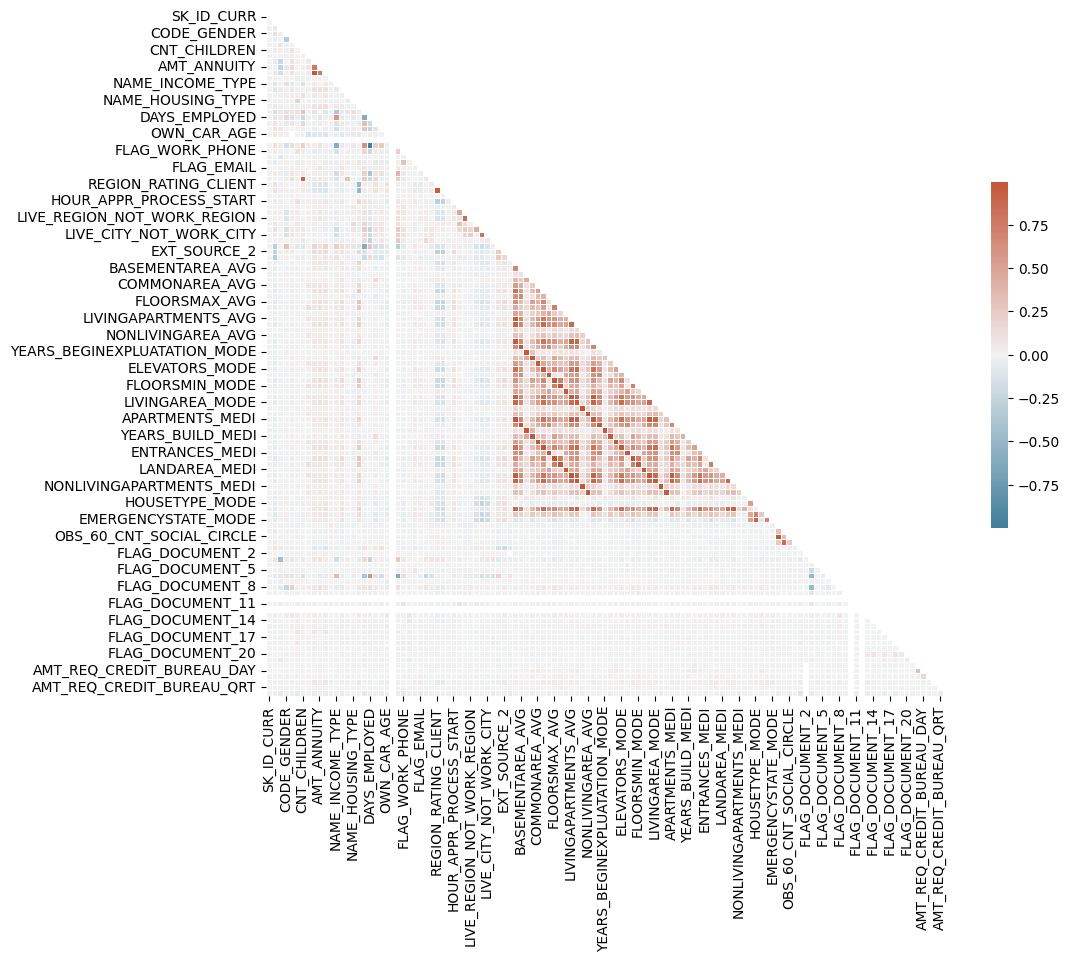

In [40]:
#Plotting Pairwise correlation

import seaborn as sns

def plot_pairwise_correlation(data):
    corr = data.corr()

    # Create a mask for the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

plot_pairwise_correlation(application_train)

Pairwise correlation: SK_ID_CURR & Target

In [41]:
def pairwise_corr_table2(data):
    corr_matrix = data[['SK_ID_CURR', 'TARGET']].corr()
    corr_table = corr_matrix.unstack().reset_index()
    corr_table.columns = ['Feature 1', 'Feature 2', 'Correlation']
    corr_table = corr_table[corr_table['Feature 1'] != corr_table['Feature 2']]
    corr_table['Correlation'] = corr_table['Correlation'].abs()
    corr_table = corr_table.sort_values(by=['Correlation'], ascending=False)
    return corr_table

In [42]:
#Pairwise correlation table for application_train
pairwise_corr_table2(application_train)

,Feature 1,Feature 2,Correlation
1,SK_ID_CURR,TARGET,0.002213
2,TARGET,SK_ID_CURR,0.002213


4.Model fitting: only include application features

In [43]:
!pip install lightgbm --install-option=--gpu
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --install-option


In [44]:
# Drop the 'SK_ID_CURR' and 'TARGET' columns from the 'application_train' dataframe, and assign the result to X
X = application_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)

# Assign the 'TARGET' column to y
Y = application_train.TARGET

# Delete the 'application_train' dataframe to free up memory, and call the garbage collector to clear any unused memory
del application_train
gc.collect()


12620

In [45]:
import pandas as pd

# Assuming your dataset is in a Pandas DataFrame named 'X'
invalid_json_chars = ['{', '}', ':', ',', ' ', '[', ']', '<', '>', '=', '&', '#', '+', '-', '*', '/', '\\', '!', '^', '`', '?', '@', '|', '$', '%', '(', ')', ';', '\'', '\"', '~', '.']
X.columns = [''.join([char for char in column if char not in invalid_json_chars]) for column in X.columns]

X, Y = shuffle(X, Y)
lgbc = LGBMClassifier(n_estimators=720, learning_rate=0.01, num_leaves=6,colsample_bytree=.3,subsample=.8, min_split_gain=.01,
                     silent=-1, verbose=-1)
lgbc.fit(X, Y)



LGBMClassifier(colsample_bytree=0.3, learning_rate=0.01, min_split_gain=0.01,
               n_estimators=720, num_leaves=6, silent=-1, subsample=0.8,
               verbose=-1)

In [46]:
feature_imp=pd.DataFrame({'feature name':X.columns,'feature importance':lgbc.feature_importances_}).sort_values('feature importance', ascending=False).iloc[:, [1,0]]
feature_imp.head()

,feature importance,feature name
40,561,EXT_SOURCE_2
41,526,EXT_SOURCE_3
39,354,EXT_SOURCE_1
8,171,AMT_GOODS_PRICE
6,168,AMT_CREDIT


Feature importance

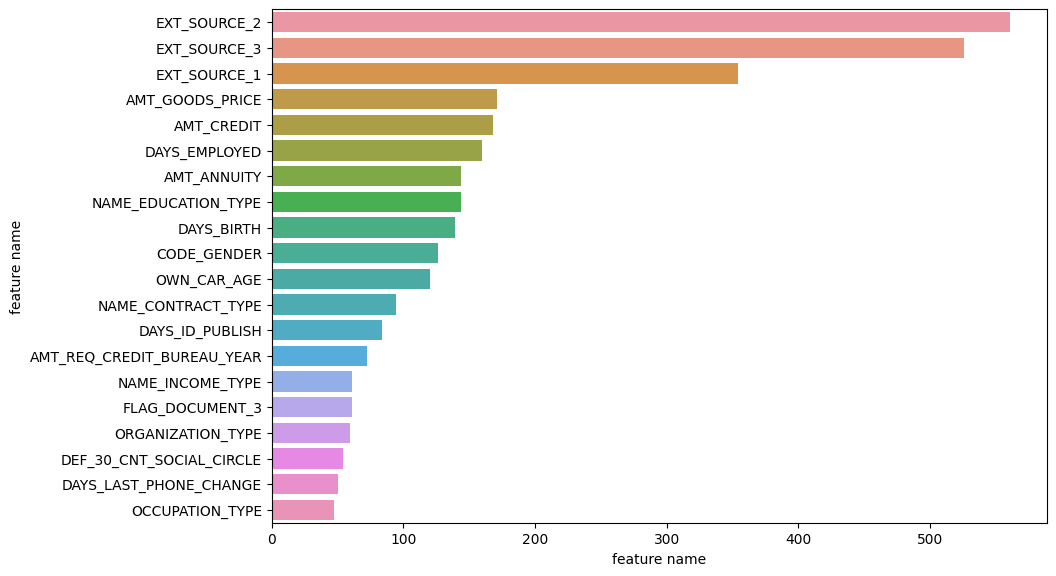

In [47]:
n_show=20
plt.figure(figsize = [10, n_show/3])
ax = sns.barplot(x = 'feature importance', y='feature name', data=feature_imp.iloc[:n_show, :], label='Feature Importance')
ax.set_xlabel('feature name')
plt.show()

Prediction

In [48]:
# Drop 'SK_ID_CURR' and 'TARGET' (if present) columns from the 'application_test' dataframe, and assign the result to X_test
X_test = application_test.drop(['SK_ID_CURR', 'TARGET'], axis=1, errors='ignore')

# Make predictions using the trained LGBMClassifier model
y_pred = lgbc.predict_proba(X_test)[:, 1]


In [49]:
output = pd.DataFrame({'SK_ID_CURR':application_test.SK_ID_CURR, 'TARGET': y_pred})
print(output)

        SK_ID_CURR    TARGET
256336      396627  0.239054
263496      405085  0.660097
196730      328105  0.671936
263059      404615  0.224143
248579      387603  0.524724
...            ...       ...
48099       155703  0.738611
57802       166989  0.287191
176837      304920  0.786629
191368      321888  0.696837
179016      307447  0.256305

[9930 rows x 2 columns]


In [50]:
#from google.colab import files

# Export the DataFrame to a CSV file
#output.to_csv('output.csv', index=False)

# Download the CSV file to your local machine
#files.download('output.csv')

## **4 Outcomes**

a. Analyze the accuracy of the ADS by comparing its performance across different subpopulations, with respect to different accuracy metrics.  Carefully justify your choice of accuracy metrics.




In [51]:
# Import necessary functions from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Merge the true labels (TARGET) and the predictions along with the subpopulation information (CODE_GENDER)
# Round the predicted probabilities (y_pred) to get binary class labels (0 or 1)
y_true = application_test['TARGET']
subpopulation_info = application_test[['SK_ID_CURR', 'CODE_GENDER']]
results = pd.DataFrame({'SK_ID_CURR': subpopulation_info.SK_ID_CURR, 'CODE_GENDER': subpopulation_info.CODE_GENDER, 'y_true': y_true, 'y_pred': y_pred.round()})

# Identify unique subpopulations based on the 'CODE_GENDER' column
subpopulations = results['CODE_GENDER'].unique()

# Create a dictionary mapping subpopulation codes to their corresponding labels
subpopulation_labels = {0: 'Male', 1: 'Female'}

# Iterate through each unique subpopulation
for subpopulation in subpopulations:
    # Filter the results DataFrame to only include rows with the current subpopulation's CODE_GENDER
    subpopulation_results = results[results['CODE_GENDER'] == subpopulation]
    
    # Extract the true labels and predicted class labels for the current subpopulation
    y_true_subpopulation = subpopulation_results['y_true']
    y_pred_subpopulation = subpopulation_results['y_pred']
    
    # Calculate and print the confusion matrix for the current subpopulation
    cm = confusion_matrix(y_true_subpopulation, y_pred_subpopulation)
    print(f"Confusion Matrix for {subpopulation_labels[subpopulation]} Subpopulation ({subpopulation}):\n{cm}\n")


Confusion Matrix for Female Subpopulation (1):
[[2485  841]
 [1039 1798]]

Confusion Matrix for Male Subpopulation (0):
[[ 979  660]
 [ 494 1634]]



In [52]:
# Calculate accuracy, precision, recall (sensitivity), and F1-score for the current subpopulation

def calculate_metrics(confusion_matrix):
    TP, FN, FP, TN = confusion_matrix.ravel()
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FN)  # Sensitivity
    recall = TP / (TP + FP)
    f1_score = 2 * TP / (2 * TP + FP + FN)
    return accuracy, precision, recall, f1_score

# Iterate through each unique subpopulation
for subpopulation in subpopulations:
    # Filter the results DataFrame to only include rows with the current subpopulation's CODE_GENDER
    subpopulation_results = results[results['CODE_GENDER'] == subpopulation]
    
    # Extract the true labels and predicted class labels for the current subpopulation
    y_true_subpopulation = subpopulation_results['y_true']
    y_pred_subpopulation = subpopulation_results['y_pred']
    
    # Calculate the confusion matrix for the current subpopulation
    cm = confusion_matrix(y_true_subpopulation, y_pred_subpopulation)

    # Calculate accuracy, precision, recall (sensitivity), and F1-score for the current subpopulation
    accuracy, precision, recall, f1_score = calculate_metrics(cm)

    print(f"Metrics for {subpopulation_labels[subpopulation]} Subpopulation ({subpopulation}):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}\n")



Metrics for Female Subpopulation (1):
Accuracy: 0.6950
Precision: 0.7471
Recall (Sensitivity): 0.7052
F1-score: 0.7255

Metrics for Male Subpopulation (0):
Accuracy: 0.6937
Precision: 0.5973
Recall (Sensitivity): 0.6646
F1-score: 0.6292



b. Analyze the fairness of the ADS, with respect to different fairness metrics.  Carefully justify your choice of fairness metrics.


In [53]:
# Calculate confusion matrices for each subpopulation
confusion_matrices = []
for subpopulation in subpopulations:
    subpopulation_results = results[results['CODE_GENDER'] == subpopulation]
    y_true_subpopulation = subpopulation_results['y_true']
    y_pred_subpopulation = subpopulation_results['y_pred']
    cm = confusion_matrix(y_true_subpopulation, y_pred_subpopulation)
    confusion_matrices.append(cm.ravel())

In [54]:
# Calculate confusion matrices for each subpopulation
#fairness metrics
def selection_rate(confusion_matrices):
    rates = [(TP + FP) / (TP + TN + FP + FN) for TP, FN, FP, TN in confusion_matrices]
    return rates

def demographic_disparity_difference_selection_rate(confusion_matrices):
    rates = selection_rate(confusion_matrices)
    return abs(rates[1] - rates[0])

def demographic_disparity_ratio_selection_rate(confusion_matrices):
    rates = selection_rate(confusion_matrices)
    return rates[1] / rates[0]

def equalized_odds(confusion_matrices):
    tpr = [TP / (TP + FN) for TP, FN, FP, TN in confusion_matrices]
    fpr = [FP / (FP + TN) for TP, FN, FP, TN in confusion_matrices]
    return abs(tpr[1] - tpr[0]), abs(fpr[1] - fpr[0])

def equal_opportunity(confusion_matrices):
    tpr = [TP / (TP + FN) for TP, FN, FP, TN in confusion_matrices]
    return abs(tpr[1] - tpr[0])

def type_i_parity_fdr(confusion_matrices):
    fdr = [FP / (TP + FP) for TP, FN, FP, TN in confusion_matrices]
    return abs(fdr[1] - fdr[0])

def type_i_parity_fpr(confusion_matrices):
    fpr = [FP / (FP + TN) for TP, FN, FP, TN in confusion_matrices]
    return abs(fpr[1] - fpr[0])

def type_ii_parity_for(confusion_matrices):
    fomr = [FN / (FN + TN) for TP, FN, FP, TN in confusion_matrices]
    return abs(fomr[1] - fomr[0])

def type_ii_parity_fnr(confusion_matrices):
    fnr = [FN / (TP + FN) for TP, FN, FP, TN in confusion_matrices]
    return abs(fnr[1] - fnr[0])

# Fairness metrics functions defined above

# Calculate fairness metrics
eo_tpr, eo_fpr = equalized_odds(confusion_matrices)
eop = equal_opportunity(confusion_matrices)
type_i_fdr = type_i_parity_fdr(confusion_matrices)
type_i_fpr = type_i_parity_fpr(confusion_matrices)
type_ii_for = type_ii_parity_for(confusion_matrices)
type_ii_fnr = type_ii_parity_fnr(confusion_matrices)
ddd_sr = demographic_disparity_difference_selection_rate(confusion_matrices)
ddr_sr = demographic_disparity_ratio_selection_rate(confusion_matrices)

# Print fairness metrics
print(f"Demographic Disparity Difference (Selection Rate): {ddd_sr:.4f}")
print(f"Demographic Disparity Ratio (Selection Rate): {ddr_sr:.4f}")
print(f"Equalized Odds (TPR): {eo_tpr:.4f}")
print(f"Equalized Odds (FPR): {eo_fpr:.4f}")
print(f"Equal Opportunity: {eop:.4f}")
print(f"Type I Parity (Equalized False Discovery Rate): {type_i_fdr:.4f}")
print(f"Type I Parity (Equalized False Positive Rate): {type_i_fpr:.4f}")
print(f"Type II Parity (Equalized False Omission Rate): {type_ii_for:.4f}")
print(f"Type II Parity (Equalized False Negative Rate): {type_ii_fnr:.4f}")



Demographic Disparity Difference (Selection Rate): 0.1808
Demographic Disparity Ratio (Selection Rate): 0.6839
Equalized Odds (TPR): 0.1498
Equalized Odds (FPR): 0.1341
Equal Opportunity: 0.1498
Type I Parity (Equalized False Discovery Rate): 0.0405
Type I Parity (Equalized False Positive Rate): 0.1341
Type II Parity (Equalized False Omission Rate): 0.0310
Type II Parity (Equalized False Negative Rate): 0.1498


C. Develop additional methods to analyze ADS performance: think about stability, robustness, performance on difficult or otherwise important examples (in the style of LIME or SHAP), or any other property that you believe is important to check for this ADS.  Carefully justify your methodology. 

In [55]:
# Install the shap library
!pip install shap

# Import the shap library
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.4 MB/s eta 0:00:00


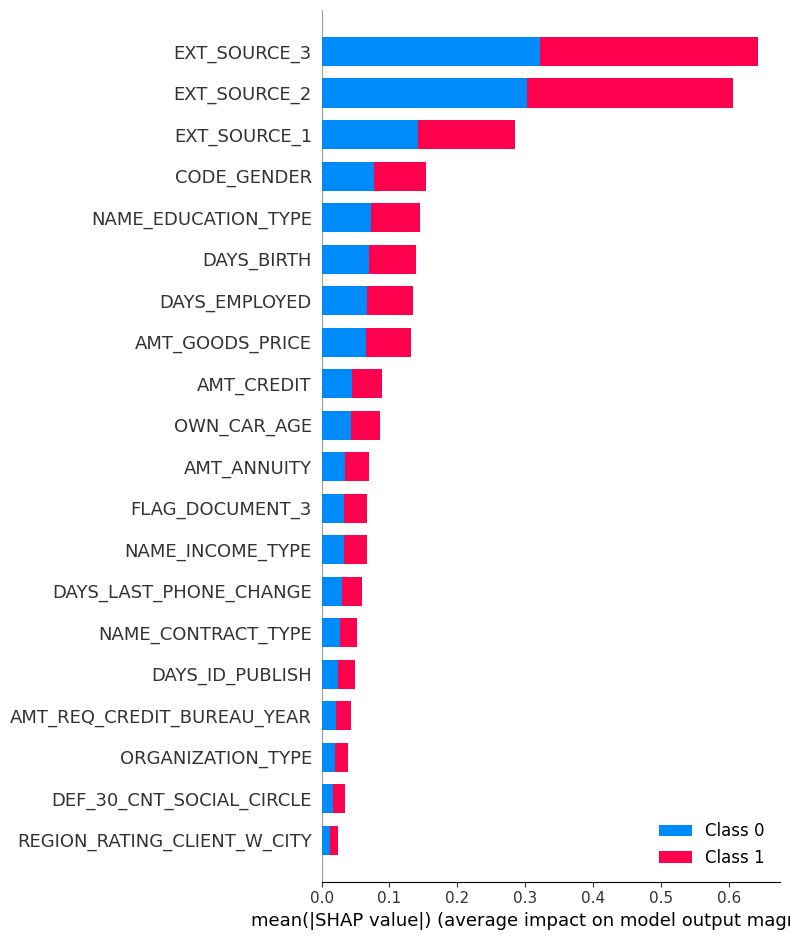

In [59]:
# Create a TreeExplainer object for the LightGBM model
explainer = shap.TreeExplainer(lgbc)

# Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test)

# Create the SHAP value summary plot
shap.summary_plot(shap_values, X_test)

# Plot the SHAP values for a single prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0, :])


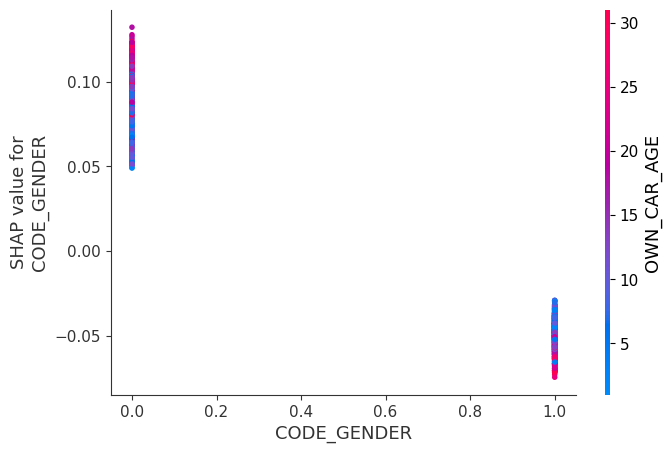

In [57]:
# Choose a feature for which you want to plot the dependence plot
feature_name = 'CODE_GENDER'

# Find the index of the chosen feature in the X_test dataset
feature_index = X_test.columns.get_loc(feature_name)

# Create the dependence plot
shap.dependence_plot(feature_index, shap_values[1], X_test)